In [41]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)

    return x1, y1, x2, y2

In [43]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms = 2)
    plt.plot(x2, y2, "o", ms = 2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.show()

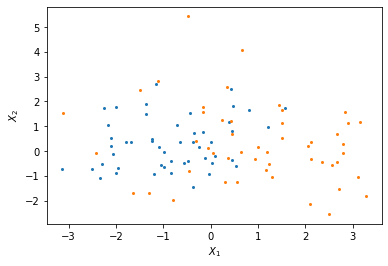

In [44]:
x1, y1, x2, y2 = gen_data(50, 1, 1, 1.5)
plot_data(x1, y1, x2, y2)

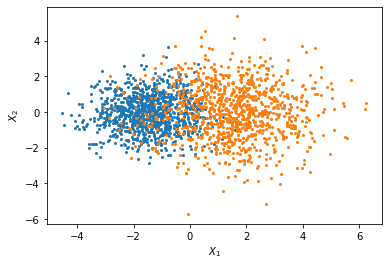

In [45]:
x1, y1, x2, y2 = gen_data(1000, 1.5, 1, 1.5)
plot_data(x1, y1, x2, y2)

In [46]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

(2000, 2)

In [47]:
y = np.hstack((np.repeat(1, 1000), np.repeat(2, 1000)))
y.shape

(2000,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 1)

X_train.shape

(1000, 2)

In [49]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.898

In [50]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))

array([[0.9749429, 0.0250571]])

Text(0.5, 1.0, 'Pred. prob for class 2')

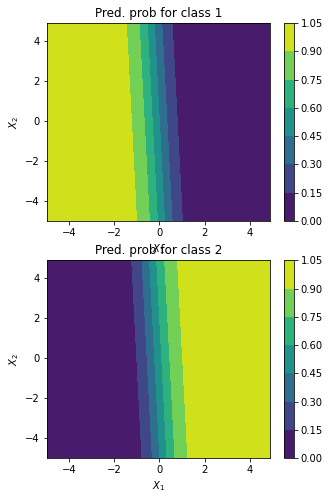

In [51]:
def plot_probs(ax, clf, class_no):
    X1, X2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((X1.ravel(), X2.ravel()), axis = 1))
    Z = probs[:, class_no]
    Z = Z.reshape(X1.shape)
    CS = ax.contourf(X1, X2, Z)

    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

plt.figure(figsize = (5,8))

ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")

ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2")